In [1]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

Tokenizing  
1. Splits inputs into words, subwords/symbols called tokens
2. map each token to integer
3. add additional inputs useful to model

Checkpoints are saved versions of a model's weights and configurations at different training stages

AutoTokenizer.from_pretrained extracts the tokenizer used during training of said model

In [2]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Once we have the tokenizer, we can directly pass our sentences to it and we’ll get back a dictionary that’s ready to feed to our model! The only thing left to do is to convert the list of input IDs to tensors.

The output itself is a dictionary containing two keys, input_ids and attention_mask. input_ids contains two rows of integers (one for each sentence) that are the unique identifiers of the tokens in each sentence.

In [3]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt") # pt specifies which type of tensor (pytorch, tensorflow or numpy)
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


In [4]:
type(inputs["input_ids"])  # Should return <class 'torch.Tensor'>

torch.Tensor

We can download our pretrained model the same way we did with our tokenizer. 🤗 Transformers provides an AutoModel class which also has a from_pretrained() method:

This model only outputs hidden states, not predictions like "positive" or "negative."

In [6]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint) # AutoModel loads the base model (no classification, translation, etc.)
# from_pretrained(checkpoint) downloads the model weights (or loads them from cache if already downloaded)

What Are Hidden States?  
Hidden states are high-dimensional vectors (numerical representations) that capture the contextual meaning of the input text.  
Each word in a sentence is converted into a vector.  
These vectors are refined as they pass through multiple Transformer layers.  
The final hidden states are useful for tasks like classification, translation, and question answering.

A Transformer model without a head produces only hidden states. But for tasks like classification, we need a head—a small neural network that converts these hidden states into useful outputs.

Example:  
Sentiment Analysis → A classification head outputs labels like positive or negative.  
Text Generation → A decoder head generates words.  
Named Entity Recognition (NER) → A token classification head labels words.  

💡 For distilbert-base-uncased-finetuned-sst-2-english, the model is meant for classification, so we should use AutoModelForSequenceClassification instead of AutoModel.

The vector output by the Transformer module is usually large. It generally has three dimensions:

Batch size: The number of sequences processed at a time (2 sentences were passed in our example).  
Sequence length: The length of the numerical representation of the sequence (16 elements in input vectors in our example).  
Hidden size: The vector dimension of each model input.  
It is said to be “high dimensional” because of the last value. The hidden size can be very large (768 is common for smaller models, and in larger models this can reach 3072 or more).

In [9]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


Note that the outputs of 🤗 Transformers models behave like namedtuples or dictionaries. You can access the elements by attributes (like we did) or by key (outputs["last_hidden_state"]), or even by index if you know exactly where the thing you are looking for is (outputs[0]).

In [10]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.1798,  0.2333,  0.6321,  ..., -0.3017,  0.5008,  0.1481],
         [ 0.2758,  0.6497,  0.3200,  ..., -0.0760,  0.5136,  0.1329],
         [ 0.9046,  0.0985,  0.2950,  ...,  0.3352, -0.1407, -0.6464],
         ...,
         [ 0.1466,  0.5661,  0.3235,  ..., -0.3376,  0.5100, -0.0561],
         [ 0.7500,  0.0487,  0.1738,  ...,  0.4684,  0.0030, -0.6084],
         [ 0.0519,  0.3729,  0.5223,  ...,  0.3584,  0.6500, -0.3883]],

        [[-0.2937,  0.7283, -0.1497,  ..., -0.1187, -1.0227, -0.0422],
         [-0.2206,  0.9384, -0.0951,  ..., -0.3643, -0.6605,  0.2407],
         [-0.1536,  0.8988, -0.0728,  ..., -0.2189, -0.8528,  0.0710],
         ...,
         [-0.3017,  0.9002, -0.0200,  ..., -0.1082, -0.8412, -0.0861],
         [-0.3338,  0.9674, -0.0729,  ..., -0.1952, -0.8181, -0.0634],
         [-0.3454,  0.8824, -0.0426,  ..., -0.0993, -0.8329, -0.1065]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)

There are many different architectures available in 🤗 Transformers, with each one designed around tackling a specific task. Here is a non-exhaustive list:

*Model (retrieve the hidden states)  
*ForCausalLM  
*ForMaskedLM  
*ForMultipleChoice  
*ForQuestionAnswering  
*ForSequenceClassification  
*ForTokenClassification  
and others 🤗  

In [11]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint) # AutoModelForSequenceClassification for sentiment analysis
outputs = model(**inputs)

In [15]:
outputs.logits # 2 labels for 2 sentences, raw logit values for each label for each sentence

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)

In [18]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1) # pass logits through sofmax for prob
print(predictions)

tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


First sentence: NEGATIVE: 0.0402, POSITIVE: 0.9598  
Second sentence: NEGATIVE: 0.9995, POSITIVE: 0.0005

In [19]:
model.config.id2label # negative in index 0, postive in index 1

{0: 'NEGATIVE', 1: 'POSITIVE'}

AutoModel is wrapper that auotmatically detects the model of the chekpoint provided

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-uncased")  # Loads a BERT model
model = AutoModel.from_pretrained("roberta-base")  # Loads a RoBERTa model
model = AutoModel.from_pretrained("distilbert-base-uncased")  # Loads a DistilBERT model

We can manually specify what model to load, the code below only loads checkpoints with Bert models

In [25]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\steve\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\steve\.cache\huggingface\hub\models--bert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Creating a transformer from scratch, all weights are randomly initialised, resource and time intensive to train

In [20]:
from transformers import BertConfig, BertModel

# Building the config
config = BertConfig()
# Building the model from the config
model = BertModel(config)
# Model is randomly initialized!
print(config)

BertConfig {
  "_attn_implementation_autoset": true,
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.49.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [22]:

sequences = ["Hello!", "Cool.", "Nice!"]
# Tokenisers converts the sequences into input_ids
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

import torch
model_inputs = torch.tensor(encoded_sequences) # convert input ids into tensors
model_inputs

tensor([[ 101, 7592,  999,  102],
        [ 101, 4658, 1012,  102],
        [ 101, 3835,  999,  102]])

In [26]:
output = model(model_inputs)
output # outputs hidden states, pass into head for different tasks

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9394e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1966e-03]],

        [[ 3.6436e-01,  3.2465e-02,  2.0258e-01,  ...,  6.0111e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1128e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1320e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6061e-02,
           3.3564e-01,  2

Vocabulary is defined by the total number of independent tokens that we have in our corpus.  
['Jim', 'Henson', 'was', 'a', 'puppeteer']

There are also variations of word tokenizers that have extra rules for punctuation. With this kind of tokenizer, we can end up with some pretty large “vocabularies,” where a vocabulary is defined by the total number of independent tokens that we have in our corpus.

Each word gets assigned an ID, starting from 0 and going up to the size of the vocabulary. The model uses these IDs to identify each word.

If we want to completely cover a language with a word-based tokenizer, we’ll need to have an identifier for each word in the language, which will generate a huge amount of tokens. For example, there are over 500,000 words in the English language, so to build a map from each word to an input ID we’d need to keep track of that many IDs. Furthermore, words like “dog” are represented differently from words like “dogs”, and the model will initially have no way of knowing that “dog” and “dogs” are similar: it will identify the two words as unrelated. The same applies to other similar words, like “run” and “running”, which the model will not see as being similar initially.

Finally, we need a custom token to represent words that are not in our vocabulary. This is known as the “unknown” token, often represented as ”[UNK]” or ”<unk>”. It’s generally a bad sign if you see that the tokenizer is producing a lot of these tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way. The goal when crafting the vocabulary is to do it in such a way that the tokenizer tokenizes as few words as possible into the unknown token.

One way to reduce the amount of unknown tokens is to go one level deeper, using a character-based tokenizer.

Character-based tokenizers split the text into characters, rather than words. This has two primary benefits:

The vocabulary is much smaller.
There are much fewer out-of-vocabulary (unknown) tokens, since every word can be built from characters.
But here too some questions arise concerning spaces and punctuation:
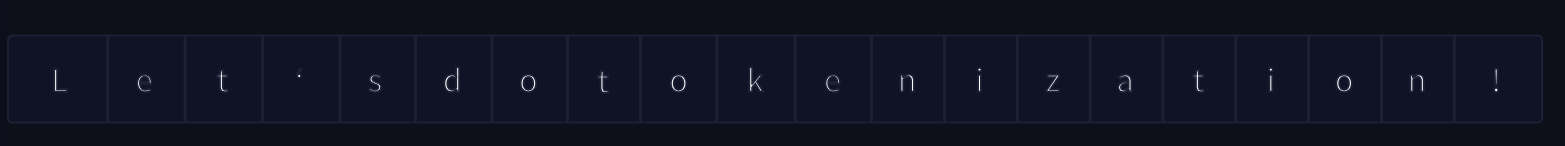
An example of character-based tokenization.
This approach isn’t perfect either. Since the representation is now based on characters rather than words, one could argue that, intuitively, it’s less meaningful: each character doesn’t mean a lot on its own, whereas that is the case with words. However, this again differs according to the language; in Chinese, for example, each character carries more information than a character in a Latin language.

Another thing to consider is that we’ll end up with a very large amount of tokens to be processed by our model: whereas a word would only be a single token with a word-based tokenizer, it can easily turn into 10 or more tokens when converted into characters.

To get the best of both worlds, we can use a third technique that combines the two approaches: subword tokenization.

Subword tokenization algorithms rely on the principle that frequently used words should not be split into smaller subwords, but rare words should be decomposed into meaningful subwords.

For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.

Here is an example showing how a subword tokenization algorithm would tokenize the sequence “Let’s do tokenization!“:
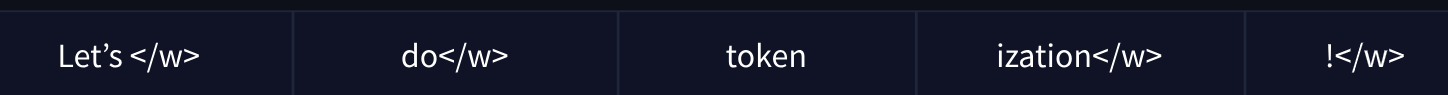

A subword tokenization algorithm.
These subwords end up providing a lot of semantic meaning: for instance, in the example above “tokenization” was split into “token” and “ization”, two tokens that have a semantic meaning while being space-efficient (only two tokens are needed to represent a long word). This allows us to have relatively good coverage with small vocabularies, and close to no unknown tokens.

This approach is especially useful in agglutinative languages such as Turkish, where you can form (almost) arbitrarily long complex words by stringing together subwords.

Unsurprisingly, there are many more techniques out there. To name a few:  
Byte-level BPE, as used in GPT-2  
WordPiece, as used in BERT  
SentencePiece or Unigram, as used in several multilingual models

In [29]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [38]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence) # use .tokenize to output each token in sub-words

print(tokens) # sub-word tokeniser

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


In [40]:
ids = tokenizer.convert_tokens_to_ids(tokens) # input tokens and output input_ids
print(ids)
tokenizer(sequence)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


{'input_ids': [101, 7993, 170, 13809, 23763, 2443, 1110, 3014, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [42]:
sequence = ["I’ve been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
tokens = tokenizer.tokenize(sequence) # tokenize treats list as one string
print(tokens)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

tokenizer(sequence) # fast way

['I', '’', 've', 'been', 'waiting', 'for', 'a', 'Hu', '##gging', '##F', '##ace', 'course', 'my', 'whole', 'life', '.', 'I', 'hate', 'this', 'so', 'much', '!']
[146, 787, 1396, 1151, 2613, 1111, 170, 20164, 10932, 2271, 7954, 1736, 1139, 2006, 1297, 119, 146, 4819, 1142, 1177, 1277, 106]


{'input_ids': [[101, 146, 787, 1396, 1151, 2613, 1111, 170, 20164, 10932, 2271, 7954, 1736, 1139, 2006, 1297, 119, 102], [101, 146, 4819, 1142, 1177, 1277, 106, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]]}

Decoding is going the other way around: from vocabulary indices, we want to get a string. This can be done with the decode() method as follows:

In [45]:
decoded_string = tokenizer.decode([101, 7993, 170, 11303, 1200, 2443, 1110, 3014, 102])
print(decoded_string)

[CLS] Using a transformer network is simple [SEP]


Note that the decode method not only converts the indices back to tokens, but also groups together the tokens that were part of the same words to produce a readable sentence. This behavior will be extremely useful when we use models that predict new text (either text generated from a prompt, or for sequence-to-sequence problems like translation or summarization).

By now you should understand the atomic operations a tokenizer can handle: tokenization, conversion to IDs, and converting IDs back to a string. However, we’ve just scraped the tip of the iceberg. In the following section, we’ll take our approach to its limits and take a look at how to overcome them.

In [50]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
input_ids = torch.tensor(ids)
print(input_ids)
# This line will fail. ids should be in a list like this [ids], this is a batch
# model(input_ids)

tensor([ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
         2026,  2878,  2166,  1012])


In [47]:
tokenized_inputs = tokenizer(sequence, return_tensors="pt")
print(tokenized_inputs["input_ids"])

tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102]])


In [48]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence = "I've been waiting for a HuggingFace course my whole life."

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)

input_ids = torch.tensor([ids])
print("Input IDs:", input_ids)

output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


Batching is the act of sending multiple sentences through the model, all at once. If you only have one sentence, you can just build a batch with a single sequence:  
batched_ids = [ids, ids]  
This is a batch of two identical sequences!

In [55]:
batched_ids = [ids, ids]
input_ids = torch.tensor(batched_ids)
print("Input IDs:", input_ids)
output = model(input_ids)
print("Logits:", output.logits)

Input IDs: tensor([[ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012],
        [ 1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,  2607,
          2026,  2878,  2166,  1012]])
Logits: tensor([[-2.7276,  2.8789],
        [-2.7276,  2.8789]], grad_fn=<AddmmBackward0>)


Batching allows the model to work when you feed it multiple sentences. Using multiple sequences is just as simple as building a batch with a single sequence. There’s a second issue, though. When you’re trying to batch together two (or more) sentences, they might be of different lengths. If you’ve ever worked with tensors before, you know that they need to be of rectangular shape, so you won’t be able to convert the list of input IDs into a tensor directly. To work around this problem, we usually pad the inputs.

In [ ]:
# This list of lists cannot be converted to a tensor, diff dimensions
batched_ids = [
    [200, 200, 200],
    [200, 200]
]

In order to work around this, we’ll use padding to make our tensors have a rectangular shape. Padding makes sure all our sentences have the same length by adding a special word called the padding token to the sentences with fewer values. For example, if you have 10 sentences with 10 words and 1 sentence with 20 words, padding will ensure all the sentences have 20 words. In our example, the resulting tensor looks like this:

In [56]:
padding_id = 100

batched_ids = [
    [200, 200, 200],
    [200, 200, padding_id],
]

The padding token ID can be found in tokenizer.pad_token_id. Let’s use it and send our two sentences through the model individually and batched together:

In [57]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits) # logit values diff from logit of batched_ids
print(model(torch.tensor(batched_ids)).logits)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


There’s something wrong with the logits in our batched predictions: the second row should be the same as the logits for the second sentence, but we’ve got completely different values!

This is because the key feature of Transformer models is attention layers that contextualize each token. These will take into account the padding tokens since they attend to all of the tokens of a sequence. To get the same result when passing individual sentences of different lengths through the model or when passing a batch with the same sentences and padding applied, we need to tell those attention layers to ignore the padding tokens. This is done by using an attention mask.

Attention masks  
Attention masks are tensors with the exact same shape as the input IDs tensor, filled with 0s and 1s: 1s indicate the corresponding tokens should be attended to, and 0s indicate the corresponding tokens should not be attended to (i.e., they should be ignored by the attention layers of the model).

Let’s complete the previous example with an attention mask:

In [60]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask)) # attention_mask also needs to be tensored

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits) # with attention masks, logit values should be the same
print(outputs.logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


Exercise: 
“I’ve been waiting for a HuggingFace course my whole life.” and “I hate this so much!”

In [70]:
sequence1 = "I’ve been waiting for a HuggingFace course my whole life."
sequence2 = "I hate this so much!"
sequence1_ids = [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence1))]
sequence2_ids = [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence2))]

n = len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence1)))-len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence2)))
sequence2_ids_paddings = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence2)) + [tokenizer.pad_token_id] * n
batched_ids = [tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence1)), sequence2_ids_paddings]
attention_mask = [
    [1] * len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence1))),
    [1] * len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sequence2))) + [0] * n,
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))) # attention_mask also needs to be tensored

tensor([[-2.5720,  2.6852]], grad_fn=<AddmmBackward0>)
tensor([[ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>)
SequenceClassifierOutput(loss=None, logits=tensor([[-2.5720,  2.6852],
        [ 3.1931, -2.6685]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


Longer sequences  
With Transformer models, there is a limit to the lengths of the sequences we can pass the models. Most models handle sequences of up to 512 or 1024 tokens, and will crash when asked to process longer sequences. There are two solutions to this problem:

Use a model with a longer supported sequence length.  
Truncate your sequences.  
Models have different supported sequence lengths, and some specialize in handling very long sequences. Longformer is one example, and another is LED.   If you’re working on a task that requires very long sequences, we recommend you take a look at those models.

Otherwise, we recommend you truncate your sequences by specifying the max_sequence_length parameter:  
sequence = sequence[:max_sequence_length]

In [74]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Single Sequence
sequence = "I've been waiting for a HuggingFace course my whole life."
model_inputs = tokenizer(sequence)
print(model_inputs)

# Multiple sequences
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]
model_inputs = tokenizer(sequences)
print(model_inputs)

{'input_ids': [101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102], [101, 2061, 2031, 1045, 999, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1]]}


Padding

In [75]:
# Will pad the sequences up to the maximum sequence length
model_inputs = tokenizer(sequences, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs = tokenizer(sequences, padding="max_length", max_length=8)

Truncation

In [ ]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Will truncate the sequences that are longer than the model max length
# (512 for BERT or DistilBERT)
model_inputs = tokenizer(sequences, truncation=True)

# Will truncate the sequences that are longer than the specified max length
model_inputs = tokenizer(sequences, max_length=8, truncation=True)

The tokenizer object can handle the conversion to specific framework tensors, which can then be directly sent to the model. For example, in the following code sample we are prompting the tokenizer to return tensors from the different frameworks — "pt" returns PyTorch tensors, "tf" returns TensorFlow tensors, and "np" returns NumPy arrays:

In [76]:
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

# Returns PyTorch tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="pt")
print(model_inputs)

# Returns TensorFlow tensors
model_inputs = tokenizer(sequences, padding=True, return_tensors="tf")
print(model_inputs)

# Returns NumPy arrays
model_inputs = tokenizer(sequences, padding=True, return_tensors="np")
print(model_inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  2061,  2031,  1045,   999,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}
{'input_ids': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662,
        12172,  2607,  2026,  2878,  2166,  1012,   102],
       [  101,  2061,  2031,  1045,   999,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(2, 16), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])>}
{'input_ids': array([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 1766

Special tokens 101 and 102

In [77]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012, 102]
[1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 1012]


In [78]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))

[CLS] i've been waiting for a huggingface course my whole life. [SEP]
i've been waiting for a huggingface course my whole life.


The tokenizer added the special word [CLS] at the beginning and the special word [SEP] at the end. This is because the model was pretrained with those, so to get the same results for inference we need to add them as well. Note that some models don’t add special words, or add different ones; models may also add these special words only at the beginning, or only at the end. In any case, the tokenizer knows which ones are expected and will deal with this for you.

In [81]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

model_inputs = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**model_inputs)
'''
In Python, when you pass ** before a dictionary, it unpacks the dictionary and passes each key-value pair as separate keyword arguments to the function. 
In this case, model(**model_inputs) unpacks the model_inputs dictionary 
and passes each of its keys (like 'input_ids', 'attention_mask', etc.) as keyword arguments to the model.
output = model(input_ids=model_inputs['input_ids'], attention_mask=model_inputs['attention_mask'])
'''
print(output)

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


Summary:  
sequence -> tokens -> [token_ids + padding] -> tensors + attention mask -> hidden state 3 dims (sequence length, batch size, hidden size) -> output based on head